

# Project: Investigate Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project the movie dataset wil be used in analysis, the focus of analysis will be see top tiltes in some aspect like budget, revenue, etc.

##Questions##

We can make question like, what movies are in top 10, the revenue of each in top, the budget, see te relations between genre, runtime and so on

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive 
import matplotlib.pyplot as plt
%matplotlib inline
#drive.mount('/content/gdrive')

from google.colab import drive
drive.mount('/content/drive')

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tmdb-movies.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [ ]:
#check the info of raw dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Some columns have less records in comparison from others, we have 10866 record at all

In [ ]:
#lets see the first two records of dataset, and check how the informatiosn take form in each column
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [ ]:
#function to see how unique records we have in one or more certain columns
def how_unique(*columns):
  for column in columns:
    print(column.upper(),'have ',len(df[column]),' unique records')

how_unique('cast')

CAST have  10866  unique records



### Data Cleaning

In [ ]:
#drop snome cloumsn that we not use in analysis
df.drop(labels=['homepage','tagline','vote_count', 'vote_average', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   director              10822 non-null  object 
 8   keywords              9373 non-null   object 
 9   overview              10862 non-null  object 
 10  runtime               10866 non-null  int64  
 11  genres                10843 non-null  object 
 12  production_companies  9836 non-null   object 
 13  release_date          10866 non-null  object 
 14  release_year          10866 non-null  int64  
dtypes: float64(1), int6

From 21 columns, now we have 15, the columns homepage,tagline,vote_count, vote_average, budget_adj, revenue_adj are droped


In [ ]:
#drop null and duplicates to have a final custom dataset to work with
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8664 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8664 non-null   int64  
 1   imdb_id               8664 non-null   object 
 2   popularity            8664 non-null   float64
 3   budget                8664 non-null   int64  
 4   revenue               8664 non-null   int64  
 5   original_title        8664 non-null   object 
 6   cast                  8664 non-null   object 
 7   director              8664 non-null   object 
 8   keywords              8664 non-null   object 
 9   overview              8664 non-null   object 
 10  runtime               8664 non-null   int64  
 11  genres                8664 non-null   object 
 12  production_companies  8664 non-null   object 
 13  release_date          8664 non-null   object 
 14  release_year          8664 non-null   int64  
dtypes: float64(1), int64

<a id='eda'></a>
## Exploratory Data Analysis

### What is the revenue of top 10 titles

In [ ]:
labels=['revenue','original_title']
df.head(10)[labels]


,revenue,original_title
0,1513528810,Jurassic World
1,378436354,Mad Max: Fury Road
2,295238201,Insurgent
3,2068178225,Star Wars: The Force Awakens
4,1506249360,Furious 7
5,532950503,The Revenant
6,440603537,Terminator Genisys
7,595380321,The Martian
8,1156730962,Minions
9,853708609,Inside Out


### Graphics

#Pie chart showing the budget % of 10 biggest budget titles

In [ ]:
import plotly.express as px

fig = px.pie(df.head(10), values='budget', names='original_title', title='% of budget from top 10 Titles')
fig.show()

Star Wars: The Force Awakens have the most percentual budget;

Minions have the least percentual of budget;

##Bar chart show the relation between runtime and genres from head(10) of dataset

In [ ]:
import plotly.express as px
fig = px.bar(df.head(10), x='genres', y='runtime', title='genres x runtime')
fig.update_layout(title='Genres X Runtime')
fig.update_yaxes(title='Runtime (min)')
fig.update_xaxes(title='Genres')
fig.show()

##Bar chart show the runtime of all movies (using matplotlib)

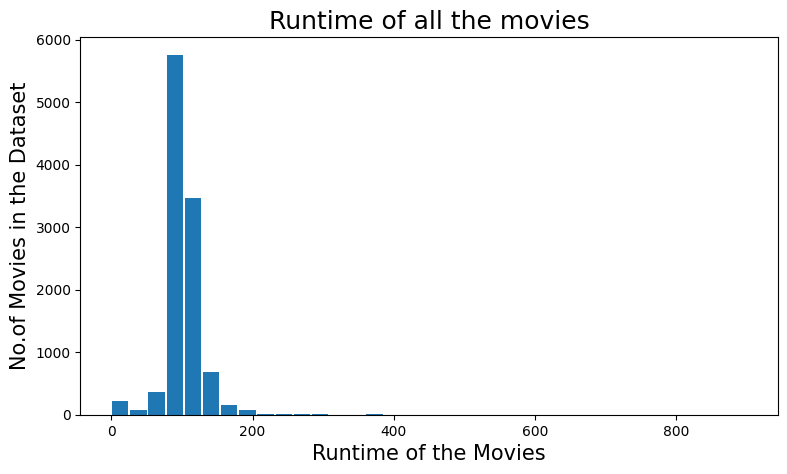

In [ ]:
plt.figure(figsize=(9,5), dpi = 100)

plt.xlabel('Runtime of the Movies', fontsize = 15)

plt.ylabel('No.of Movies in the Dataset', fontsize=15)

plt.title('Runtime of all the movies', fontsize=18)

plt.hist(df['runtime'], rwidth = 0.9, bins =35)


plt.show()

##Runtime of the movie using different kind of plots (Box Plot and Data Point Plot, using seaborn)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


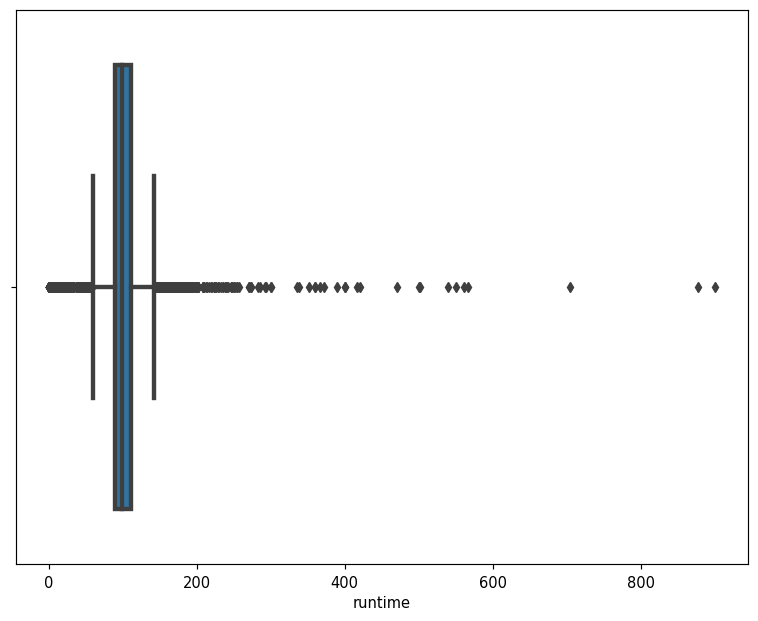

In [ ]:
import seaborn as sns

plt.figure(figsize=(9,7), dpi = 105)

sns.boxplot(df['runtime'], linewidth = 3)

plt.show()

<a id='conclusions'></a>
## Some Conclusions


Star Wars: The Force Awakens has biggest part of amount and Minios are the last one in amount percentual

Titles with Comedy and Family have less than 120 minutes, otherwise, great part of Action, some Adventure, thriller and Sci-Fi movies have more than 120 minutes

## Limitations

---



In the dataset we have 10866 entries, with this number is possible make good analysis;


Some values is missing or duplicate, we don´t use this in analysis, so the records are drop using dropna or drop_duplicates in Python;

With the dataset customed to correct data, we start making our analysis, plot graphics and etcetera;

No currency is mentioned in the dataset. So for analysis i will cosider it in US dollar as it is the most common international currency.

vote_count is different for all the movies, so we cannot directly conculed the popularity of the movies based on the average vote count